#Torsional Oscillator

#Imports

In [1]:
import numpy as np #numpy is for arrays and matricies operations
import pandas as pd #Pandas is for data manipulation and analysis, esp structures and operations for manipulating numerical tables
import scipy.stats as ss # stats
import matplotlib.pyplot as plt # graphing



In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
sheet_id = "1DCE2fU1IOOTACkmHYz2ftKtwC3b9D0dsWxzaMWUdH2w"

In [3]:
#for editing google sheets directly from python (we don't need to do that here I don't think)

#from google.colab import auth
#auth.authenticate_user()

#import gspread
#from oauth2client.client import GoogleCredentials

#gc = gspread.authorize(GoogleCredentials.get_application_default())

In [4]:
#Copied from Terry's Python_Plot&DataAnalysis.ipynb
'''
fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(ddate, maine_data['Temp (F)'], label = 'Temp')
p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Temperature ($^{\circ}$F)', color=txt, fontsize=16)
ax.set_xlabel(r'Year', color=txt, fontsize=16)
ax.set_title(r'Maine - Temperature vs Year', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()
'''

'\nfig, ax = plt.subplots()\ntxt = \'black\'\np1 = ax.plot(ddate, maine_data[\'Temp (F)\'], label = \'Temp\')\np2 = ax.plot(ddate, fit, color = \'black\', label = \'Linear Fit\')\np3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = \'orange\', label = r\'1$\\sigma$ PI\')\np4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = \'yellow\', label = r\'2$\\sigma$ CI\')\nax.set_ylabel(r\'Temperature ($^{\\circ}$F)\', color=txt, fontsize=16)\nax.set_xlabel(r\'Year\', color=txt, fontsize=16)\nax.set_title(r\'Maine - Temperature vs Year\', color=txt, fontsize = 18)\nax.tick_params(axis=\'x\', labelsize=16, colors=txt)\nax.tick_params(axis=\'y\', labelsize=16, colors=txt)\nax.legend(loc=\'lower right\')\nplt.rcParams["figure.figsize"] = (16,9)\nplt.show()\n'

In [5]:
# I have defined a function that allows you to put in set a dataframe =driveSheetToDF(Sheet_id, Sheet_Name) and it will return a df
def driveSheetToDF(Sheet_id, Sheet_Name):
  Sheet_url = f"https://docs.google.com/spreadsheets/d/{Sheet_id}/gviz/tq?tqx=out:csv&sheet={Sheet_Name}"
  New_df_name = pd.read_csv(Sheet_url)
  return(New_df_name)
  driveSheetToDF()

#September 7, 2023

In [6]:
#linear fit from graph of

Correctional_Offset_Rad = [3, 2.5, 3.5, 2.0, 4.0, 1.5, 4.5]
Correctional_Offset_Rad_uncert = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
Correctional_Offset_Voltage = [0.00, -0.7573, 0.7091, -1.558, 1.446, -2.152, 2.168] #plus or minus 0.003 y-intercepts
Correctional_Offset_Voltage_uncert =[0.003, 0.004, 0.003, 0.001, 0.007, 0.002, 0.002] #Uncertainty of y-intercepts



In [7]:
df = pd.DataFrame(list(zip(Correctional_Offset_Rad, Correctional_Offset_Rad_uncert, Correctional_Offset_Voltage, Correctional_Offset_Voltage_uncert)),
               columns =['Radians', 'Rad_Uncert', 'Voltage', 'Voltage_Uncert'])

In [8]:
df

,Radians,Rad_Uncert,Voltage,Voltage_Uncert
0,3.0,0.05,0.0000,0.003
1,2.5,0.05,-0.7573,0.004
2,3.5,0.05,0.7091,0.003
3,2.0,0.05,-1.5580,0.001
4,4.0,0.05,1.4460,0.007
5,1.5,0.05,-2.1520,0.002
6,4.5,0.05,2.1680,0.002


<ErrorbarContainer object of 3 artists>

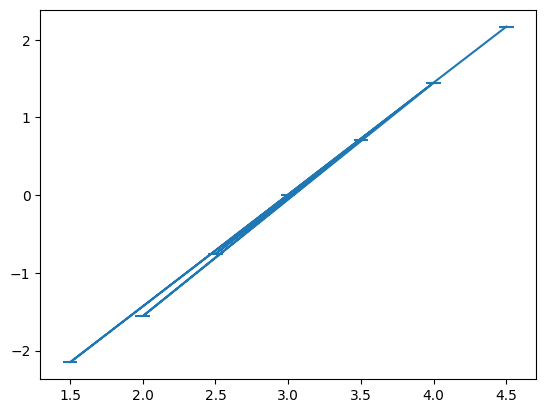

In [9]:
plt.errorbar(df.Radians, df.Voltage, xerr=df.Rad_Uncert, yerr= df.Voltage_Uncert)

In [10]:
df = df.sort_values('Radians')# sort in ascending order so graph does not bounce around.
df

,Radians,Rad_Uncert,Voltage,Voltage_Uncert
5,1.5,0.05,-2.1520,0.002
3,2.0,0.05,-1.5580,0.001
1,2.5,0.05,-0.7573,0.004
0,3.0,0.05,0.0000,0.003
2,3.5,0.05,0.7091,0.003
4,4.0,0.05,1.4460,0.007
6,4.5,0.05,2.1680,0.002


<ErrorbarContainer object of 3 artists>

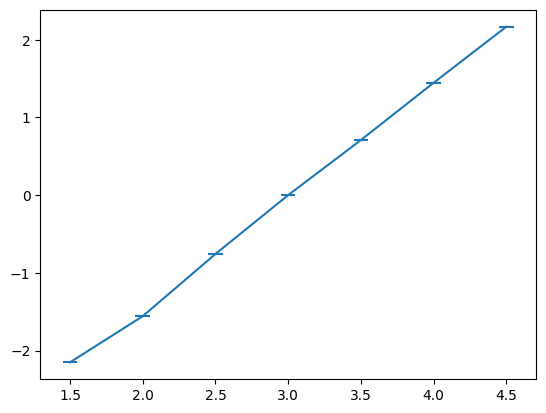

In [11]:
plt.errorbar(df.Radians, df.Voltage, xerr=df.Rad_Uncert, yerr= df.Voltage_Uncert)

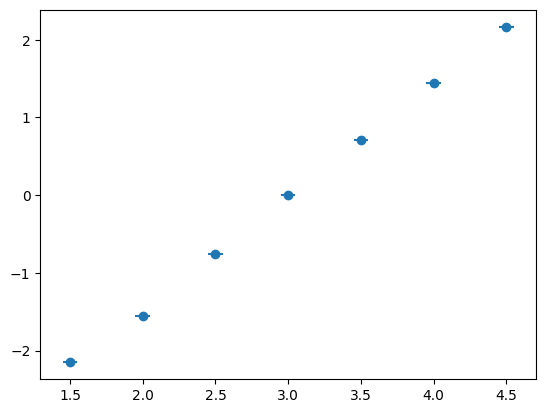

In [12]:
#plt.plot(Correctional_Offset_Rad, Correctional_Offset_Voltage, 'bo')
plt.errorbar(Correctional_Offset_Rad, Correctional_Offset_Voltage,
             xerr=0.05,
             yerr=Correctional_Offset_Voltage_uncert,
             fmt ='o')
plt.show()

1.4596
-4.3994


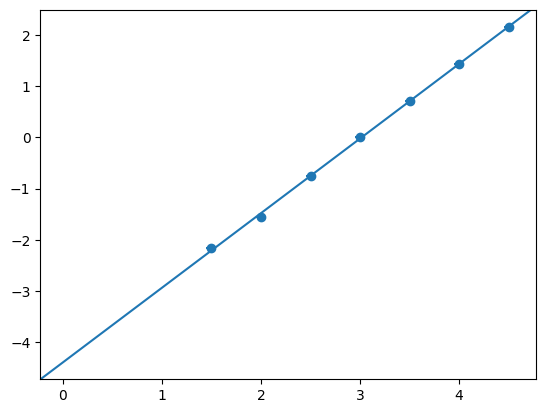

In [13]:
#Linear Regression using SciPy

m, b, *_ = ss.linregress(df.Radians, df.Voltage)
print(m)
print(b)

plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')

plt.errorbar(Correctional_Offset_Rad, Correctional_Offset_Voltage,
             xerr=0.05,
             yerr=Correctional_Offset_Voltage_uncert,
             fmt ='o')
plt.show()

#Thursday, September 14, 2023


Attached "sighting wire" plastic to apparatus

Attached Pulley string as seen in 1-3 Fig 1.0b

Attached Pulleys to Damper Assembly using black plastic thumb screws

Radius of rotor shaft at string attachment point as measured by Isaac the $\pm $ is the uncertainty of Isaac's measurement with the calipers.

$= 1.27 \pm 0.03 cm $

$= 0.0127 \pm 0.0003m$

$= 1.27x10^{-2} \pm 3x10^{-4}m  $

In [14]:
rotor_shaft_radius = 0.0127
rotor_shaft_radius_uncert = 0.0003

## Hanging Masses

Each mass had an uncertainty measurement of 0.05g as measured by Isaac C.


Left Set

50g hook =$ 49.9g \pm 0.05g $

50g weight = $ 49.8g \pm 0.05g $

100g weight = $ 100.0g \pm 0.05g $

200g weight = $ 200.1g \pm 0.05g $

Right Set

50g hook =$ 49.6g \pm 0.05g $

50g weight = $ 50.0g \pm 0.05g $

100g weight = $ 100.1g \pm 0.05g $

200g weight = $ 200.2g \pm 0.05g $

In [15]:
sheet_id = "1DCE2fU1IOOTACkmHYz2ftKtwC3b9D0dsWxzaMWUdH2w"
sheet_name = "HangingMasses"
HangingMasses_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

HangingMass_df = pd.read_csv(HangingMasses_url)
HangingMass_df.head(4)

,Expect,Left,Lmass_uncert,Right,Rmass_uncert
0,50Hook,49.8,0.1,49.6,0.1
1,50weight,49.9,0.1,50.0,0.1
2,100weight,100.0,0.1,100.1,0.1
3,200weight,200.1,0.1,200.2,0.1


In [16]:
#Replaces 5 previous lines with 2 lines.
HangingMass_df = driveSheetToDF(sheet_id,"HangingMasses")
HangingMass_df.head(4)

,Expect,Left,Lmass_uncert,Right,Rmass_uncert
0,50Hook,49.8,0.1,49.6,0.1
1,50weight,49.9,0.1,50.0,0.1
2,100weight,100.0,0.1,100.1,0.1
3,200weight,200.1,0.1,200.2,0.1


##Calculate G in room

Force is calculated from the mean of 20 second data collections using a Dual range force sensor.

The Force Standard Error is calculated using using Standard error $= \frac{\sigma}{\sqrt{n}} $ from each 20 second data collection with the Dual range force sensor. σ was calculated for us by LoggerPro.   

the Standanard Error for each test was 0.004.


In [17]:
gravity_df = driveSheetToDF(sheet_id,"Gravity")
gravity_df.head(4)

,kgMass,kgMass_unc,Force,Force_stderr
0,0.0498,0.00005,0.4922,0.0004
1,0.0987,0.00010,0.9817,0.0004
2,0.1997,0.00015,1.9640,0.0004
3,0.3998,0.00020,3.9490,0.0004


F = mg

g = F/m

Gravity = the slope of the linear fit of the Forces / Masses

In [18]:
#Calculate gravity here.

In [19]:
# as calculated by LoggerPro

gravity = 9.867
gravity_uncert = 0.0277

##Calculate K the Torsion Constant 'Spring Constant' of the fiber.

Torque = mass * Gravity * radius

Torque = mass * Gravity * 0.0127

**Note after Lab concluded today I found

Torque = 2 * radius *mass * Gravity

In [20]:
K_data = driveSheetToDF(sheet_id, "Kcalc")
K_data.head(5)

,Mass,MassUncert,kg_mass,kg_mass_uncert,Radians,RadiansUncert,Torque,Torque_uncert
0,0.0,0.0,0.0000,0.0000,3.00,0.02,0.000000,NaN
1,799.7,0.4,0.7997,0.0004,1.84,0.02,0.100211,NaN
2,699.8,0.3,0.6998,0.0003,1.99,0.02,0.087693,NaN
3,599.6,0.3,0.5996,0.0003,2.09,0.02,0.075136,NaN
4,499.7,0.2,0.4997,0.0002,2.20,0.02,0.062618,NaN


In [21]:
K_Torque = 2* rotor_shaft_radius * K_data.kg_mass * gravity

print(K_Torque)


0     0.000000
1     0.200422
2     0.175385
3     0.150273
4     0.125236
5     0.100098
6     0.075061
7     0.049949
8     0.024912
9    -0.024912
10   -0.049949
11   -0.075061
12   -0.100098
13   -0.125236
14   -0.150273
15   -0.175385
16   -0.200422
Name: kg_mass, dtype: float64


In [22]:
#K_TorqueUncert =
#print(K_TorqueUncert)

In [23]:
K_data['Torque'] = K_Torque
K_data.head(17)
#print(K_data)

,Mass,MassUncert,kg_mass,kg_mass_uncert,Radians,RadiansUncert,Torque,Torque_uncert
0,0.0,0.0,0.0000,0.0000,3.00,0.02,0.000000,NaN
1,799.7,0.4,0.7997,0.0004,1.84,0.02,0.200422,NaN
2,699.8,0.3,0.6998,0.0003,1.99,0.02,0.175385,NaN
3,599.6,0.3,0.5996,0.0003,2.09,0.02,0.150273,NaN
4,499.7,0.2,0.4997,0.0002,2.20,0.02,0.125236,NaN
5,399.4,0.3,0.3994,0.0003,2.32,0.02,0.100098,NaN
6,299.5,0.2,0.2995,0.0002,2.46,0.02,0.075061,NaN
7,199.3,0.2,0.1993,0.0002,2.62,0.02,0.049949,NaN
8,99.4,0.1,0.0994,0.0001,2.79,0.02,0.024912,NaN
9,-99.4,0.1,-0.0994,0.0001,3.18,0.02,-0.024912,NaN


I have manually coppied the Torque values to the google sheet to avoid data loss.

This was before I realized we were missing a 2.

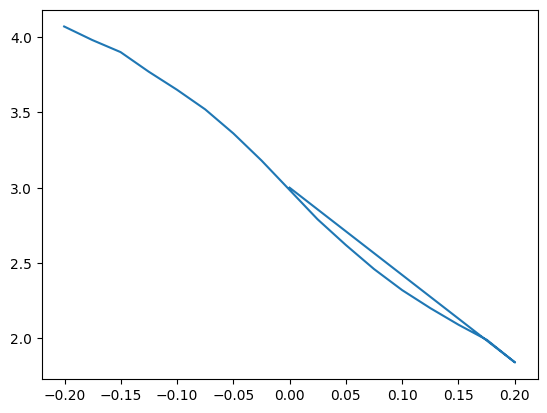

In [24]:
plt.plot(K_Torque,K_data['Radians'])

In [25]:
RadianDisplacement = K_data['Radians']-3

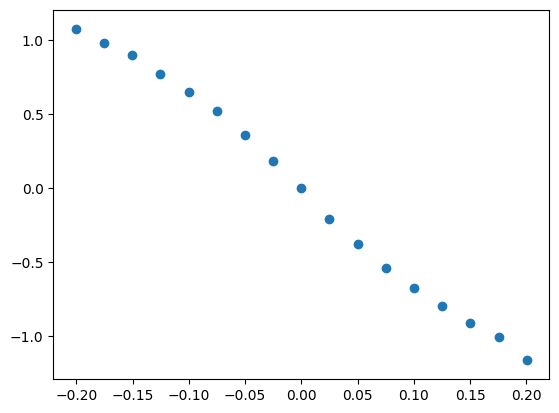

In [26]:
plt.errorbar(K_Torque,RadianDisplacement,
         #xerr= 0.05, #not the real error bars
         yerr= K_data['RadiansUncert'],
         fmt ='o')
plt.show()

#Monday September 18, 2023


To Achieve a consistent 'release' using a DC Power Supply hooked up to Helmholtz Coil Drive.

The Power Supply is set to 8.000 V and runs at 1.027 A
- Radians settle around 3.58

When the switch on the oscilator is flipped, the coil goes from 1.027 A to about 0.003 A


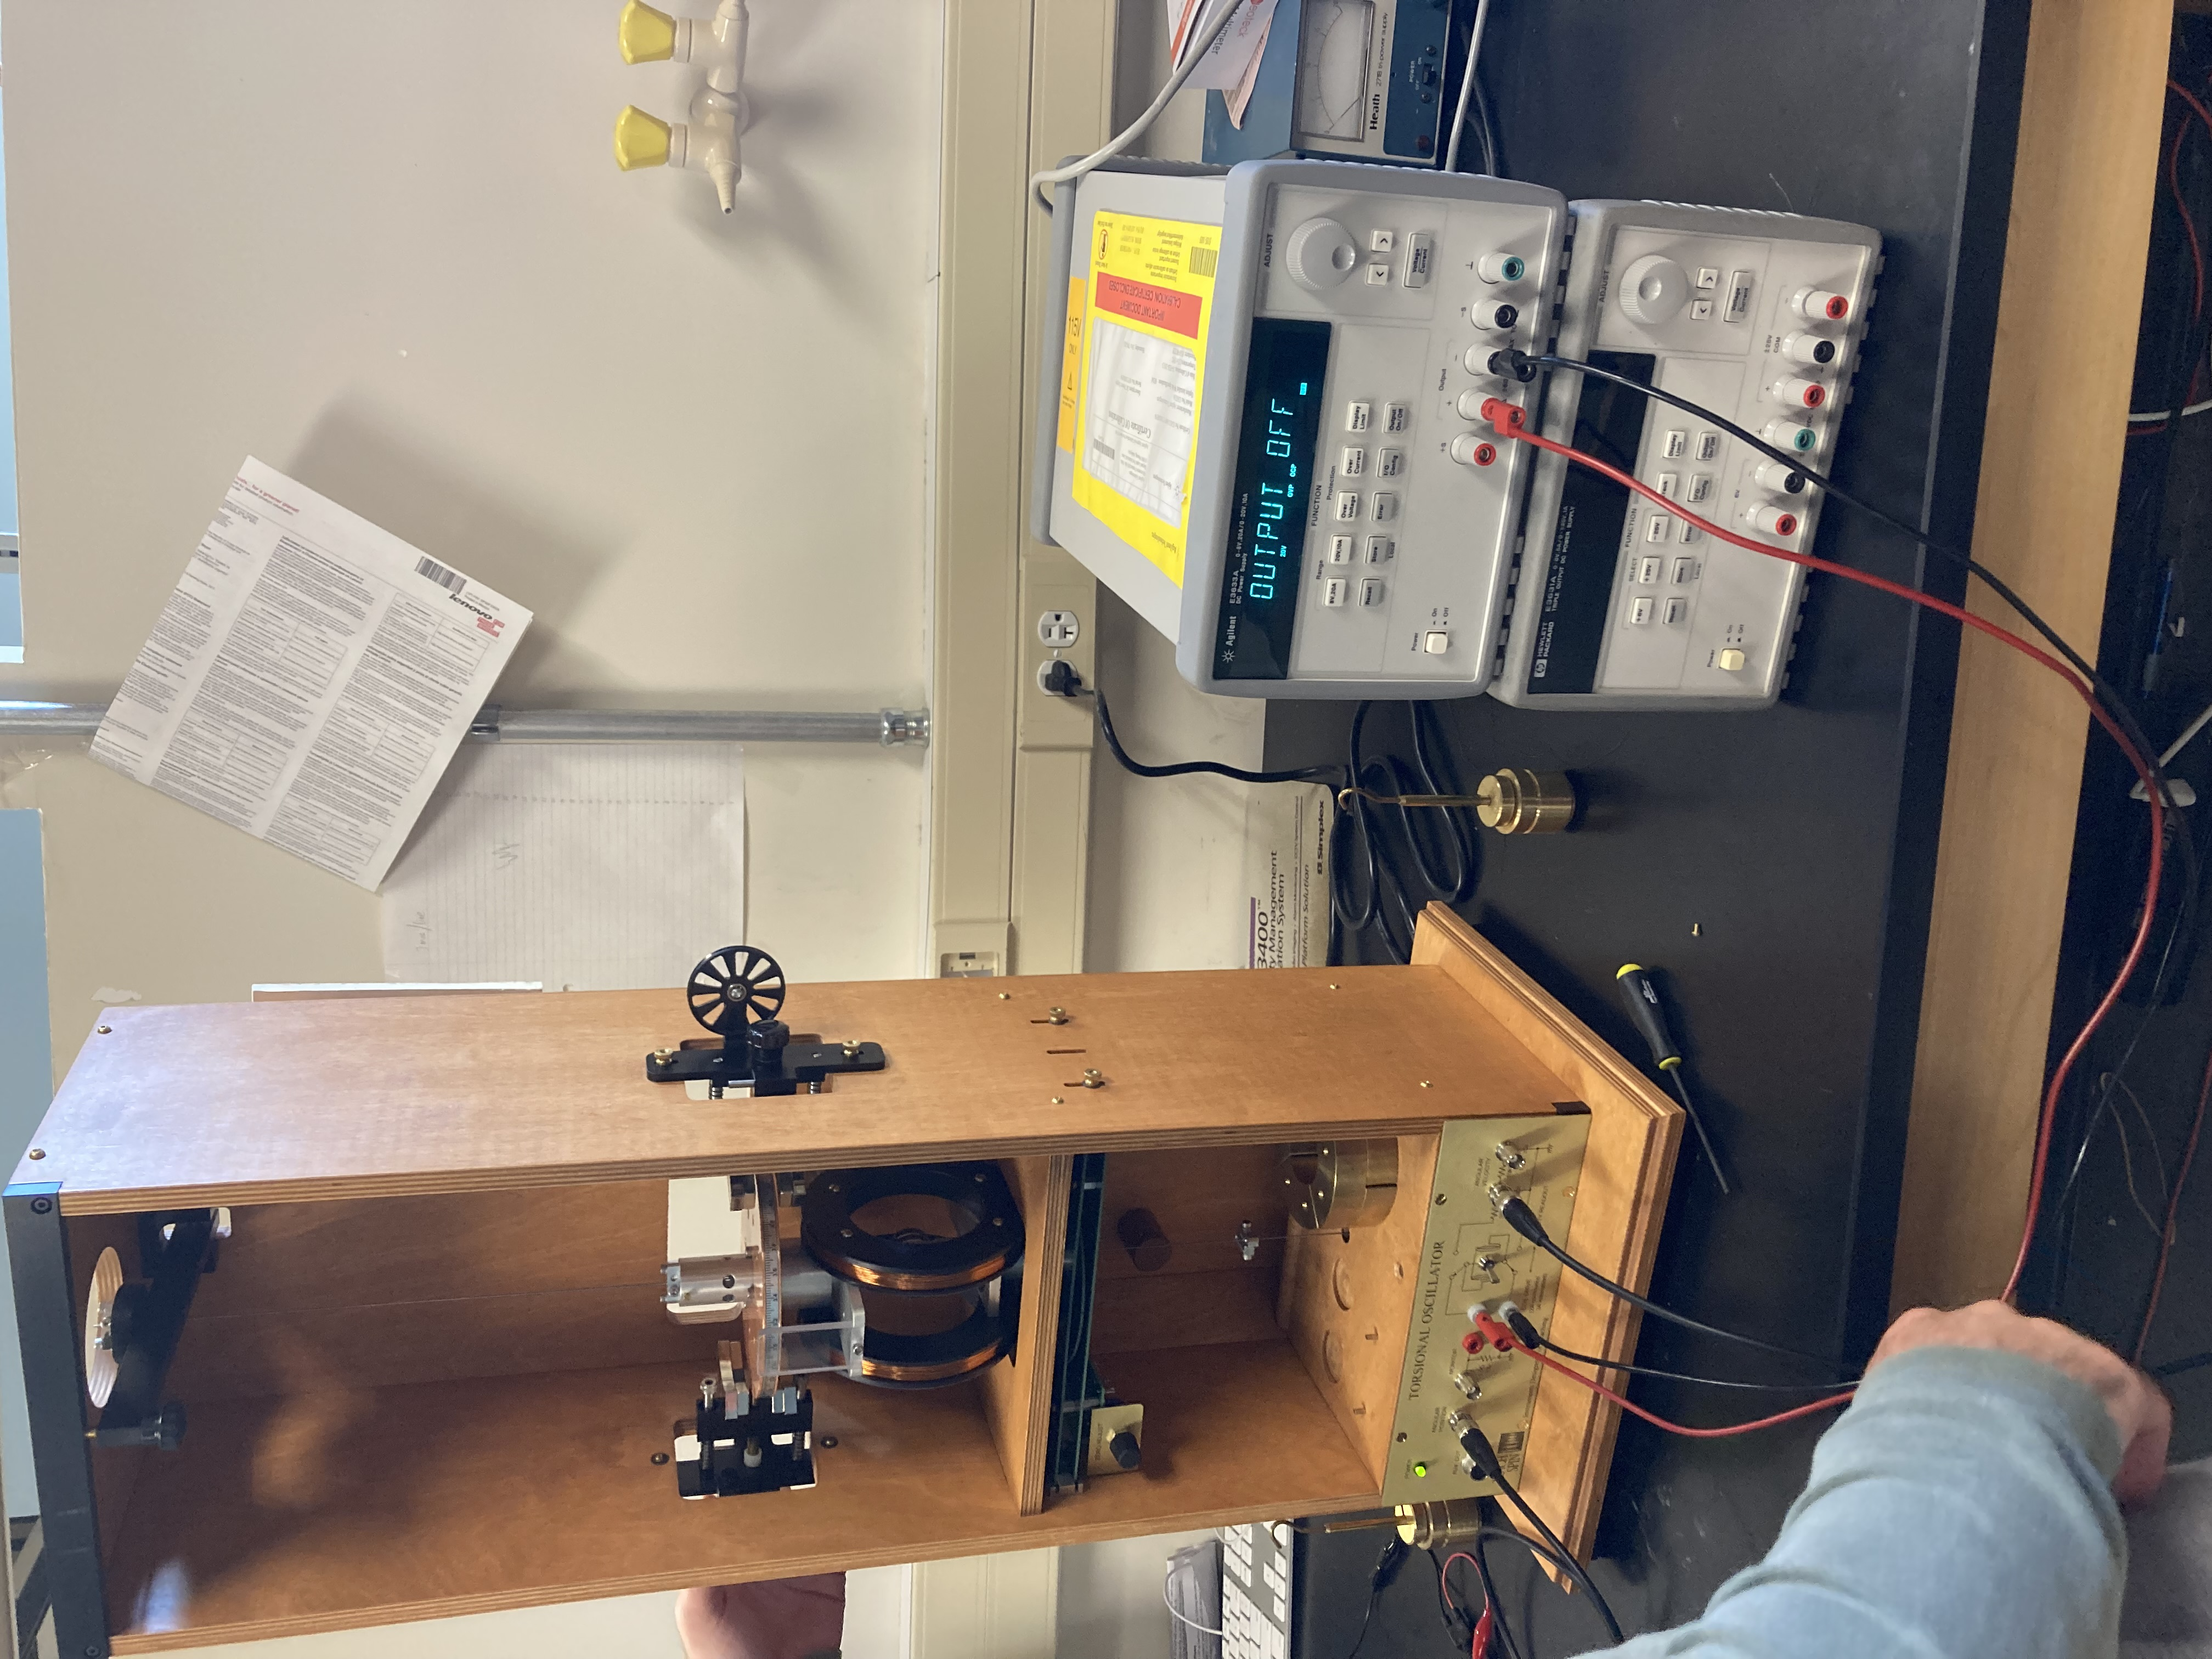

## Damping


Logger Pro column Text:

Latest: Time (s)

Latest: position (V)

Latest: angular velocity (V)

### Damping Control


In [27]:
#Control 1
sheet_id = "1DCE2fU1IOOTACkmHYz2ftKtwC3b9D0dsWxzaMWUdH2w"
sheet_name_ControlDamping1 = "ControlDamping1"
ControlDamping1_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name_ControlDamping1}"
CD1_df = pd.read_csv(ControlDamping1_url)
# oscillation starts at 1.22 seconds (row 63 in google sheets)

In [28]:
#Control 1 (done better with function)
sheet_id = "1DCE2fU1IOOTACkmHYz2ftKtwC3b9D0dsWxzaMWUdH2w"
D1_df = driveSheetToDF(sheet_id,"ControlDamping1")
CD1_df.head(5)

,Time,Position,AngularVelocity
0,0.00,0.852046,0.059425
1,0.02,0.852046,0.071635
2,0.04,0.852046,0.068582
3,0.06,0.855099,0.062477
4,0.08,0.852046,0.071635


In [29]:
CD1_df = CD1_df.drop(CD1_df.index[:61]) #drop rows of noise before oscilation starts. we want to keep the last line before it 'falls' though.
CD1_df.head(5)

,Time,Position,AngularVelocity
61,1.22,0.836784,0.062477
62,1.24,0.745209,-0.032150
63,1.26,0.803206,-0.035200
64,1.28,0.815416,-0.053520
65,1.30,0.800154,-0.062680


In [30]:
CD1_df['Time'] = CD1_df['Time']-1.22 # set time to reflect dropped rows.
CD1_df.head(5)

,Time,Position,AngularVelocity
61,0.00,0.836784,0.062477
62,0.02,0.745209,-0.032150
63,0.04,0.803206,-0.035200
64,0.06,0.815416,-0.053520
65,0.08,0.800154,-0.062680


In [31]:
#Control 2

CD2_df = driveSheetToDF(sheet_id,"ControlDamping2")
#CD2_df.head(5)
# oscillation starts at 2.08 seconds (row 106 in google sheets) First 2 rows are Python counting starting at 0 and header row.
CD2_df = CD2_df.drop(CD2_df.index[:104]) #drop rows of noise before oscilation starts.
CD2_df['Time'] = CD2_df['Time']-2.08 # set time to reflect dropped rows.
CD2_df.head(5)

,Time,Position,AngularVelocity
104,0.00,0.855099,0.059425
105,0.02,0.812364,0.062477
106,0.04,0.787944,-0.029100
107,0.06,0.824574,-0.041310
108,0.08,0.821521,-0.056570


In [32]:
#Control 3
CD3_df = driveSheetToDF(sheet_id,"ControlDamping3")
# oscillation starts at 3.02 seconds (row 153 in google sheets)
CD3_df = CD3_df.drop(CD3_df.index[:151]) #drop rows of noise before oscilation starts.
CD3_df['Time'] = CD3_df['Time']-3.02 # set time to reflect dropped rows.
CD3_df.head(5)

,Time,Position,AngularVelocity
151,0.00,0.827626,-0.00163
152,0.02,0.760471,-0.02910
153,0.04,0.790996,-0.03215
154,0.06,0.812364,-0.04741
155,0.08,0.803206,-0.06268


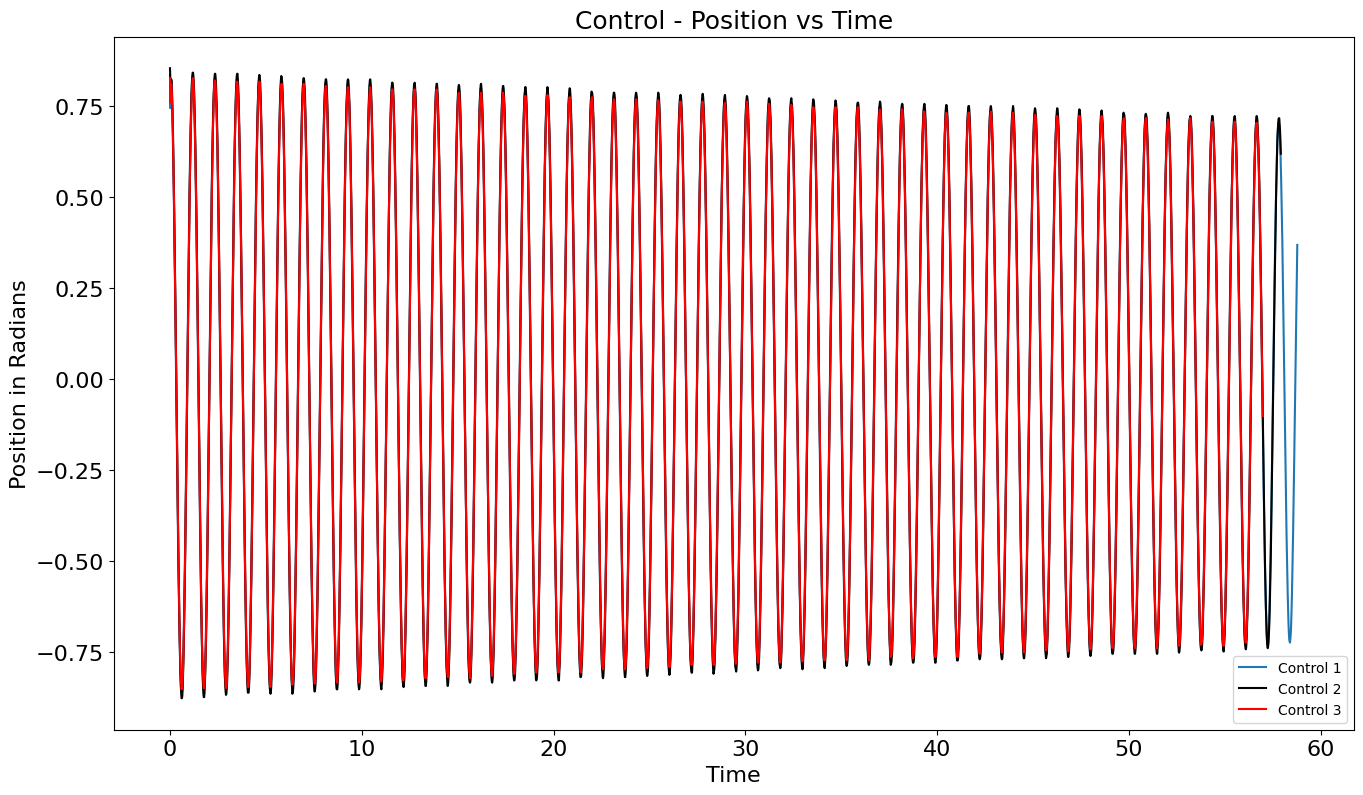

In [43]:
#Copied from Terry's Python_Plot&DataAnalysis.ipynb

fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(CD1_df['Time'], CD1_df['Position'], label = 'Control 1')
p2 = ax.plot(CD2_df['Time'], CD2_df['Position'],  color = 'black', label = 'Control 2')
p3 = ax.plot(CD3_df['Time'], CD3_df['Position'],  color = 'red', label = 'Control 3')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Position in Radians', color=txt, fontsize=16)
ax.set_xlabel(r'Time', color=txt, fontsize=16)
ax.set_title(r'Control - Position vs Time', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()


### String Damping


In [34]:
#StringDamping101
#100g (50g per side) test 1
#sheet_id = "1DCE2fU1IOOTACkmHYz2ftKtwC3b9D0dsWxzaMWUdH2w"
#sheet_name = "stringdamping101"
#StringDamping101_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
#SD101_df = pd.read_csv(StringDamping101_url)
SD101_df = driveSheetToDF(sheet_id,"stringdamping101")


#StringDamping102
SD102_df = driveSheetToDF(sheet_id,"stringdamping102")

#StringDamping103
SD103_df = driveSheetToDF(sheet_id,"stringdamping103")

In [35]:
#SD101_df.head(5)

In [36]:
#StringDamping201
#200g (100g per side) test 1
SD201_df = driveSheetToDF(sheet_id, "stringdamping201")

#StringDamping202
SD202_df  = driveSheetToDF(sheet_id, "stringdamping202")

#StringDamping203
SD203_df = driveSheetToDF(sheet_id, "stringdamping203")


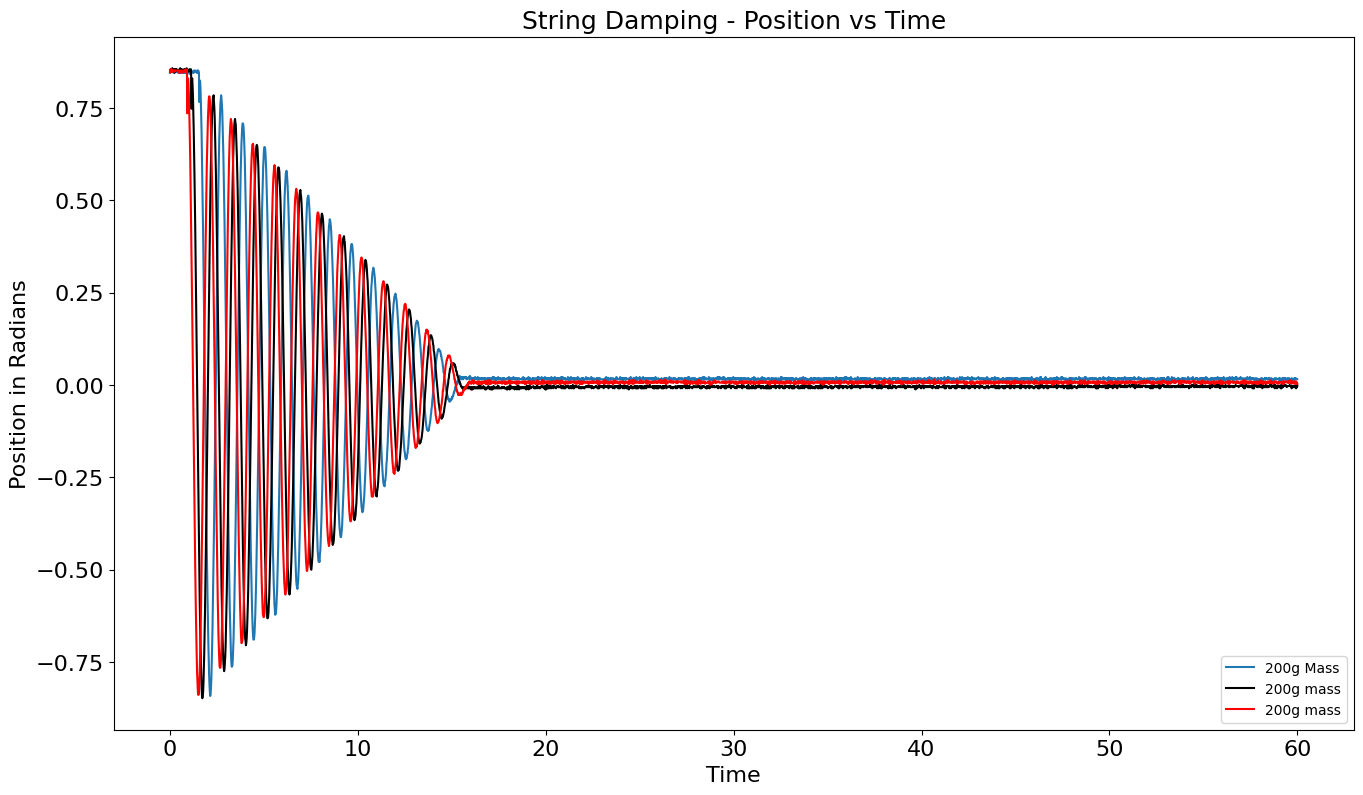

In [47]:
#Copied from Terry's Python_Plot&DataAnalysis.ipynb

fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(SD201_df['Time'], SD201_df['Position'], label = '200g Mass')
p2 = ax.plot(SD202_df['Time'], SD202_df['Position'],  color = 'black', label = '200g mass')
p3 = ax.plot(SD203_df['Time'], SD203_df['Position'],  color = 'red', label = '200g mass')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Position in Radians', color=txt, fontsize=16)
ax.set_xlabel(r'Time', color=txt, fontsize=16)
ax.set_title(r'String Damping - Position vs Time', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

In [37]:
#StringDamping301
#300g (150g per side) test 1
SD301_df = driveSheetToDF(sheet_id, "stringdamping301")

#StringDamping302
SD302_df = driveSheetToDF(sheet_id, "stringdamping302")

#StringDamping303
SD303_df= driveSheetToDF(sheet_id, "stringdamping303")


In [38]:
#StringDamping401
#400g (200g per side) test 1
SD401_df = driveSheetToDF(sheet_id, "stringdamping401")

#StringDamping402
SD402_df = driveSheetToDF(sheet_id, "stringdamping402")

#StringDamping403
SD403_df = driveSheetToDF(sheet_id, "stringdamping403")

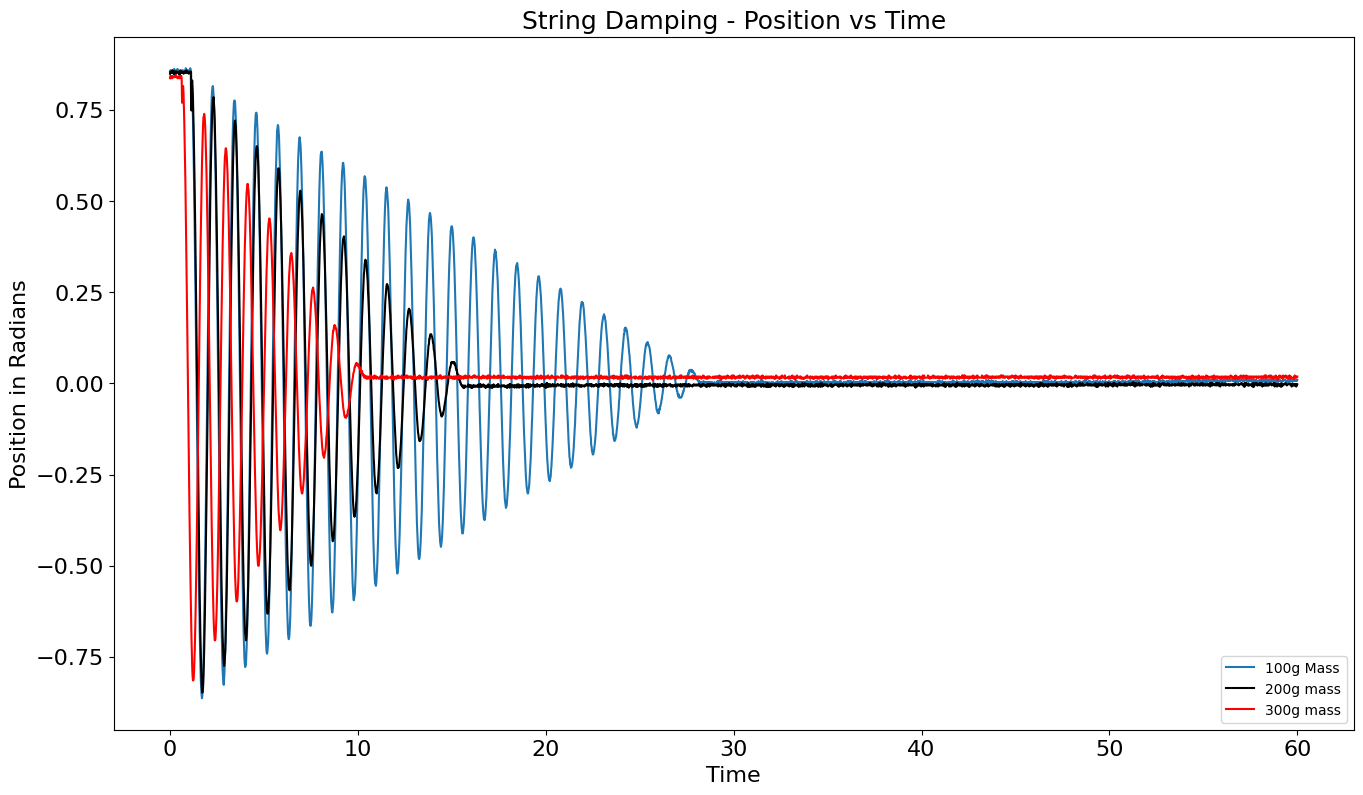

In [48]:
#Copied from Terry's Python_Plot&DataAnalysis.ipynb

fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(SD101_df['Time'], SD101_df['Position'], label = '100g Mass')
p2 = ax.plot(SD202_df['Time'], SD202_df['Position'],  color = 'black', label = '200g mass')
p3 = ax.plot(SD303_df['Time'], SD303_df['Position'],  color = 'red', label = '300g mass')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Position in Radians', color=txt, fontsize=16)
ax.set_xlabel(r'Time', color=txt, fontsize=16)
ax.set_title(r'String Damping - Position vs Time', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

### Magnetic Damping

R side 11 full turns from outside edge to fully over

5trials

0 Turns

2.75 Turns

5.50 Turns

8.25 Turns

11.00 Turns

In [39]:
#Magnetic Damping

#Magnetic Damping 01
MD01_df = driveSheetToDF(sheet_id, "magdamping01")

#Magnetic Damping 02
MD02_df = driveSheetToDF(sheet_id, "magdamping02")

#Magnetic Damping 03
MD03_df = driveSheetToDF(sheet_id, "magdamping03")

In [40]:
#magdamping2751

#Magnetic Damping 2.75 turns 1
MD2751_df = driveSheetToDF(sheet_id, "magdamping2751")

#Magnetic Damping 2.75 turns 2
MD2752_df = driveSheetToDF(sheet_id, "magdamping2752")

#Magnetic Damping 2.75 turns 3
MD2753_df = driveSheetToDF(sheet_id, "magdamping2753")

In [41]:
#magdamping5501

#Magnetic Damping 5.50 turns 1
MD5501_df = driveSheetToDF(sheet_id, "magdamping5501")

#Magnetic Damping 5.50 turns 2
MD5502_df = driveSheetToDF(sheet_id, "magdamping5502")

#Magnetic Damping 5.50 turns 3
MD5503_df = driveSheetToDF(sheet_id, "magdamping5503")

In [42]:
#magdamping8251

#Magnetic Damping 8.25 turns 1
MD8251_df = driveSheetToDF(sheet_id, "magdamping8251")

#Magnetic Damping 8.25 turns 2
MD8252_df = driveSheetToDF(sheet_id, "magdamping8252")

#Magnetic Damping 8.25 turns 3
MD8253_df = driveSheetToDF(sheet_id, "magdamping8253")

After results from 8.25, we decided 11 Full turns of the magnetic dampers was not worthwile.

### Fluid Damping
